Репозиторий: https://github.com/KorneevRV/MFDP_catch_me_if_you_can

Описание проекта: https://github.com/KorneevRV/MFDP_catch_me_if_you_can/blob/main/docs/Business%20analysis.md

In [27]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import html
import unicodedata
import re

In [28]:
# Конфигурация путей
current_folder = Path().resolve() # текущая папка
root_folder = current_folder.parent # папка с проектом
data_folder = root_folder / 'data' # папка с данными

# Данные

## Обзор доступных данных

1. [hh.ru IT vacancies (Kaggle)](https://www.kaggle.com/datasets/vyacheslavpanteleev1/hhru-it-vacancies-from-20211025-to-20211202) - 47330 уникальных IT-вакансий от HH.ru (с 2021-10-25 по 2021-12-02) для Москвы и Питера
2. Дамп [ODS Jobs](https://t.me/odsjobs) (Telegram) - дамп канала c вакансиями с 2023-03-20 по 2024-08-28
3. Дамп [better data community](https://t.me/betterdatacommunity) - дамп всех папок канала, включая папку Jobs c 2023-02-23 по 2024-08-28

# EDA

## Датасет №1 (hh.ru)

In [29]:
kaggle_dataset_1 = pd.read_csv(data_folder / 'IT_vacancies_full.csv')
kaggle_dataset_1.head(5)

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,Area,Professional roles,Specializations,Profarea names,Published at
0,49313809,Space307,Golang Developer (Кипр),True,251322.0,NaN,От 3 до 6 лет,Полный день,"['Docker', 'Golang', 'Redis', 'Английский язык...",Мы в Space307 разрабатываем международную торг...,Санкт-Петербург,"['Программист, разработчик']","['Программирование, Разработка']","['Информационные технологии, интернет, телеком']",2021-12-02 12:15:37+03:00
1,48813842,Монополия,Е-mail маркетолог,True,60900.0,NaN,От 1 года до 3 лет,Полный день,"['Грамотность', 'Написание текстов', 'Грамотна...",С 2015 года наш IT блок меняет рынок автотранс...,Санкт-Петербург,['Менеджер по маркетингу и рекламе'],['Маркетинг'],"['Информационные технологии, интернет, телеком']",2021-12-02 10:33:15+03:00
2,49413720,Eden Springs,Оператор call-центра (удаленно),False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"['Клиентоориентированность', 'Ориентация на ре...",Что нужно будет делать: Принимать входящие зв...,Санкт-Петербург,"['Оператор call-центра, специалист контактного...","['Маркетинг', 'Продажи по телефону, Телемаркет...","['Продажи', 'Информационные технологии, интерн...",2021-12-02 10:29:37+03:00
3,46460892,Импорт Хоум,Ведущий SMM специалист,True,60000.0,80000.0,От 1 года до 3 лет,Полный день,"['Продвижение бренда', 'Креативность', 'Adobe ...",В данный момент мы ищем в нашу команду самого ...,Санкт-Петербург,"['SMM-менеджер, контент-менеджер']","['Управление маркетингом', 'PR, Маркетинговые ...","['Информационные технологии, интернет, телеком...",2021-12-01 16:57:02+03:00
4,49555567,Pride Games Studio,UX/UI Designer,False,NaN,NaN,От 1 года до 3 лет,Полный день,"['UI', 'UX', 'gamedev', 'game design', 'проект...",Pride Games Studio — это команда единомышленни...,Санкт-Петербург,"['Дизайнер, художник']","['Игровое ПО', 'Программирование, Разработка',...","['Маркетинг, реклама, PR', 'Информационные тех...",2021-12-01 16:48:24+03:00


In [30]:
# Регулярное выражение для исключения строк с "системный аналитик"
regex_data_jobs_exclude = r'\bсистемный аналитик\b'

# Регулярное выражение для включения строк с релевантными вакансиями
regex_data_jobs_include = r'''
    \b(?:данн(?:ы[хймие]|[ыоая])
    |аналитик(?:а|у|ом|и|ов|ам|ами|ах)?
    |машинн(?:ое|ого|ому|ым|ом|ое|ым|ой|ая|ую|ыми|ых)
    |больш(?:ие|их|ими|ой|ую|ая|ие|ой|ому|им)
    |Data\b
    |Analyst\b
    |Analytics\b
    |Scientist\b
    |Machine Learning\b
    |ML\b
    |Big Data\b
    |BI\b
    |Business Intelligence\b
    |Data Engineer\b
    |Data Scientist\b
    |Специалист по анализу данных\b
    |Аналитик данных\b
    )
'''

# Применение фильтрации к DataFrame
kaggle_dataset_1 = kaggle_dataset_1[
    (~kaggle_dataset_1['Name'].str.contains(regex_data_jobs_exclude, case=False, regex=True)) &  # Исключение "системный аналитик"
    (kaggle_dataset_1['Name'].str.contains(regex_data_jobs_include, case=False, regex=True, flags=re.VERBOSE))  # Поиск релевантных вакансий
]

# Оставим только вакансии с зарплатами
kaggle_dataset_1 = kaggle_dataset_1[kaggle_dataset_1['Salary']==True]

In [31]:
# Сформируем два датасета. Один с нижней границей зарплатной вилки, второй с верхней границей
kaggle_dataset_1_from = kaggle_dataset_1[['Name', 'From', 'Description']][~kaggle_dataset_1['From'].isna()].reset_index(drop=True)
kaggle_dataset_1_to = kaggle_dataset_1[['Name', 'To', 'Description']][~kaggle_dataset_1['To'].isna()].reset_index(drop=True)

In [32]:
display(kaggle_dataset_1_from, kaggle_dataset_1_to)

,Name,From,Description
0,Аналитик бизнес-процессов,50000.0,Мы набираем свою команду для разработки и сопр...
1,Руководитель отдела обработки данных,130000.0,Мы расширяем команду Ипотечного брокера и ищем...
2,Аналитик данных,80000.0,Команда Важной Рыбы сейчас активно растет и ищ...
3,Аналитик,50000.0,"Привет, это международная студия образовательн..."
4,Data Scientist (Remote),120000.0,Spark Equation is a software-enabled IT and st...
...,...,...,...
948,Консультант-аналитик 1С:ERP,180000.0,"ГК «Раздолье» работает на рынке автоматизации,..."
949,Аналитик данных (web),60000.0,"Хочешь окружить себя здоровой комьюнити, где ц..."
950,Ведущий аналитик 1С,130000.0,Компания ITLand более 15 лет занимается автома...
951,Программист-аналитик,120000.0,Обязанности: исполнение задач по разработке S...


,Name,To,Description
0,Аналитик данных,120000.0,Команда Важной Рыбы сейчас активно растет и ищ...
1,Аналитик,70000.0,"Привет, это международная студия образовательн..."
2,Data Scientist (Remote),190000.0,Spark Equation is a software-enabled IT and st...
3,BI Developer,230000.0,Мы IT X 100 – мульти продуктовый стартап. Слаж...
4,Аналитик бизнес-процессов,78300.0,Heads and Hands — первая в России студия разра...
...,...,...,...
709,Аналитик данных (web),150000.0,"Хочешь окружить себя здоровой комьюнити, где ц..."
710,Ведущий аналитик 1С,200000.0,Компания ITLand более 15 лет занимается автома...
711,Data Scientist (Middle),194881.0,International startup company that aims to dev...
712,Data Scientist (Middle),194881.0,International startup company that aims to dev...


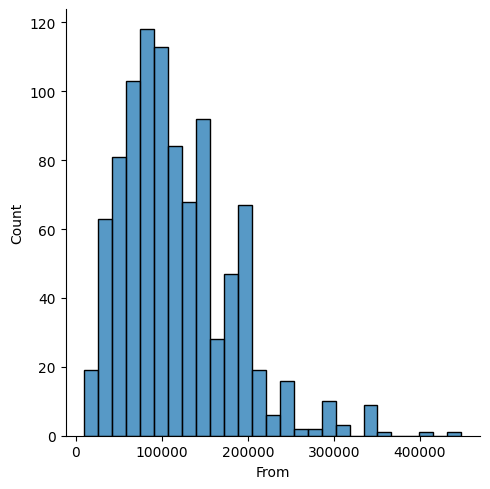

In [33]:
# Оценим распределение нижних границ вилки
sns.displot(kaggle_dataset_1_from['From'])

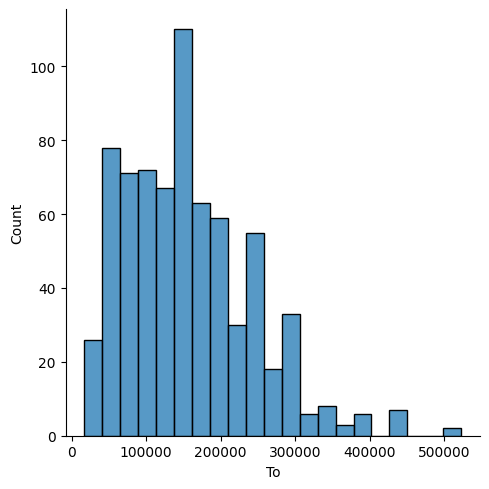

In [34]:
# Оценим распределение верхних границ вилки
sns.displot(kaggle_dataset_1_to['To'])

## Датасет №2 (ODS Jobs)

### Загрузка данных

Дамп телеграмм канала содержит сообщения со ссылками на [ODS Jobs](https://ods.ai/jobs), нужно скачать эти данные по ссылке. Загрузка данных через http запросы занимает много времени, поэтом сохраним таблицу с объединенными данными после загрузки.

In [35]:
# Запускать только для загрузки данных
'''import json

# Загрузка данных из JSON файла
with open(data_folder / 'ODS jobs.json', 'r', encoding='utf-8') as file:
    ods_jobs_json = json.load(file)

# Извлечение списка сообщений
messages = ods_jobs_json['messages']

# Преобразование в DataFrame
ods_jobs = pd.DataFrame(messages)

# Функция для обработки поля 'text'
def parse_text(text):
    if isinstance(text, list):
        return ''.join([t if isinstance(t, str) else t.get('text', '') for t in text])
    return text

# Применение функции к столбцу 'text'
ods_jobs['text'] = ods_jobs['text'].apply(parse_text)

# Вывод первых нескольких строк DataFrame
ods_jobs.head(10)'''

"import json\n\n# Загрузка данных из JSON файла\nwith open(data_folder / 'ODS jobs.json', 'r', encoding='utf-8') as file:\n    ods_jobs_json = json.load(file)\n\n# Извлечение списка сообщений\nmessages = ods_jobs_json['messages']\n\n# Преобразование в DataFrame\nods_jobs = pd.DataFrame(messages)\n\n# Функция для обработки поля 'text'\ndef parse_text(text):\n    if isinstance(text, list):\n        return ''.join([t if isinstance(t, str) else t.get('text', '') for t in text])\n    return text\n\n# Применение функции к столбцу 'text'\nods_jobs['text'] = ods_jobs['text'].apply(parse_text)\n\n# Вывод первых нескольких строк DataFrame\nods_jobs.head(10)"

In [36]:
# Запускать только для загрузки данных
'''import requests

# Функция для скачивания HTML по ссылке
def download_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.RequestException as e:
        return f"Error fetching {url}: {e}"

# Функция для извлечения ссылок и скачивания контента
def extract_and_download_html(entities):
    html_contents = []
    for entity in entities:
        if 'href' in entity:
            html_content = download_html(entity['href'])
            html_contents.append(html_content)
    return html_contents

# Применяем функцию для извлечения ссылок и загрузки HTML для каждого элемента в text_entities
ods_jobs['html_content'] = ods_jobs['text_entities'].apply(extract_and_download_html)

# Выводим результат
ods_jobs[['text_entities', 'html_content']]
ods_jobs.to_csv('ODS_jobs.csv', index=False)'''

'import requests\n\n# Функция для скачивания HTML по ссылке\ndef download_html(url):\n    try:\n        response = requests.get(url)\n        response.raise_for_status()\n        return response.text\n    except requests.RequestException as e:\n        return f"Error fetching {url}: {e}"\n\n# Функция для извлечения ссылок и скачивания контента\ndef extract_and_download_html(entities):\n    html_contents = []\n    for entity in entities:\n        if \'href\' in entity:\n            html_content = download_html(entity[\'href\'])\n            html_contents.append(html_content)\n    return html_contents\n\n# Применяем функцию для извлечения ссылок и загрузки HTML для каждого элемента в text_entities\nods_jobs[\'html_content\'] = ods_jobs[\'text_entities\'].apply(extract_and_download_html)\n\n# Выводим результат\nods_jobs[[\'text_entities\', \'html_content\']]\nods_jobs.to_csv(\'ODS_jobs.csv\', index=False)'

### Подготовка данных

In [37]:
# Считаем сохраненную таблицу, подготовленную на этапе загрузки данных
ods_jobs = pd.read_csv(data_folder / 'ODS_jobs.csv')
ods_jobs.head(5)

,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,edited,edited_unixtime,from,from_id,reply_to_message_id,message_id,html_content
0,service,2023-03-20T21:46:30,1679337990,ODS #jobs,channel1803785868,create_channel,ODS #jobs,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,[]
1,message,2023-03-21T19:15:48,1679415348,NaN,NaN,NaN,NaN,ETA: 48 часов\nФорма добавления вакансий на od...,"[{'type': 'plain', 'text': 'ETA: 48 часов\nФор...",2023-03-21T22:39:45,1.679428e+09,ODS #jobs,channel1803785868,NaN,NaN,[]
2,message,2023-03-23T18:27:33,1679585253,NaN,NaN,NaN,NaN,/id,"[{'type': 'bot_command', 'text': '/id'}]",2023-03-23T20:41:07,1.679593e+09,ODS #jobs,channel1803785868,NaN,NaN,[]
3,message,2023-03-23T18:27:33,1679585253,NaN,NaN,NaN,NaN,-1001803785868,"[{'type': 'plain', 'text': '-1001803785868'}]",2023-03-23T18:27:39,1.679585e+09,ODS #jobs,channel1803785868,6.0,NaN,[]
4,message,2023-03-23T18:27:48,1679585268,NaN,NaN,NaN,NaN,Сейчас все будет 🤗,"[{'type': 'plain', 'text': 'Сейчас все будет 🤗'}]",2023-03-23T18:27:54,1.679585e+09,ODS #jobs,channel1803785868,NaN,NaN,[]


In [38]:
from bs4 import BeautifulSoup

# Функция для извлечения названия вакансии
def extract_vacancy_title(html_data):
    soup = BeautifulSoup(html_data, 'html.parser')

    # Находим элемент <span> с нужным классом
    vacancy_span = soup.find('span', class_='jsx-fe0e291715a86afa jsx-251439498')
    
    # Извлекаем текст из элемента
    if vacancy_span:
        vacancy_title = vacancy_span.get_text()
        # Убираем слово "Hidden" если оно есть в начале строки
        clean_vacancy_title = vacancy_title.replace("Hidden", "").strip()
        return clean_vacancy_title
    else:
        return None

# Применяем функцию ко всем строкам
ods_jobs['vacancy_title'] = ods_jobs['html_content'].apply(extract_vacancy_title)

# Выводим DataFrame с новым столбцом
ods_jobs


,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,edited,edited_unixtime,from,from_id,reply_to_message_id,message_id,html_content,vacancy_title
0,service,2023-03-20T21:46:30,1679337990,ODS #jobs,channel1803785868,create_channel,ODS #jobs,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,[],None
1,message,2023-03-21T19:15:48,1679415348,NaN,NaN,NaN,NaN,ETA: 48 часов\nФорма добавления вакансий на od...,"[{'type': 'plain', 'text': 'ETA: 48 часов\nФор...",2023-03-21T22:39:45,1.679428e+09,ODS #jobs,channel1803785868,NaN,NaN,[],None
2,message,2023-03-23T18:27:33,1679585253,NaN,NaN,NaN,NaN,/id,"[{'type': 'bot_command', 'text': '/id'}]",2023-03-23T20:41:07,1.679593e+09,ODS #jobs,channel1803785868,NaN,NaN,[],None
3,message,2023-03-23T18:27:33,1679585253,NaN,NaN,NaN,NaN,-1001803785868,"[{'type': 'plain', 'text': '-1001803785868'}]",2023-03-23T18:27:39,1.679585e+09,ODS #jobs,channel1803785868,6.0,NaN,[],None
4,message,2023-03-23T18:27:48,1679585268,NaN,NaN,NaN,NaN,Сейчас все будет 🤗,"[{'type': 'plain', 'text': 'Сейчас все будет 🤗'}]",2023-03-23T18:27:54,1.679585e+09,ODS #jobs,channel1803785868,NaN,NaN,[],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,message,2024-08-23T17:18:53,1724422733,NaN,NaN,NaN,NaN,Senior Data scientist (Computer Vision)\n300 0...,"[{'type': 'text_link', 'text': 'Senior Data sc...",2024-08-23T17:19:14,1.724423e+09,ODS #jobs,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Senior Data scientist (Computer Vision)
378,message,2024-08-26T11:33:39,1724661219,NaN,NaN,NaN,NaN,Senior ML Engineer\n3 400 – 4 200 €/месяц\nУда...,"[{'type': 'text_link', 'text': 'Senior ML Engi...",2024-08-26T11:35:04,1.724661e+09,ODS #jobs,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Senior ML Engineer
379,message,2024-08-26T15:20:34,1724674834,NaN,NaN,NaN,NaN,Data Scientist LLM (Global markets)\n250 000 –...,"[{'type': 'text_link', 'text': 'Data Scientist...",2024-08-26T15:22:14,1.724675e+09,ODS #jobs,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Data Scientist LLM (Global markets)
380,message,2024-08-28T11:18:57,1724833137,NaN,NaN,NaN,NaN,Deep Learning Engineer in Audio (Diffusions)\n...,"[{'type': 'text_link', 'text': 'Deep Learning ...",2024-08-28T11:19:23,1.724833e+09,ODS #jobs,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Deep Learning Engineer in Audio (Diffusions)


In [39]:
# Функция для извлечения зарплаты
def extract_salary(html_data):
    soup = BeautifulSoup(html_data, 'html.parser')

    # Находим элементы <strong>
    salary_element = soup.find('strong', class_='jsx-9fa5834268eb3de')
    if salary_element:
        salary_text = salary_element.get_text()
        # Декодируем HTML-сущности
        salary_text = html.unescape(salary_text)
        # Нормализуем текст
        salary_text = unicodedata.normalize('NFKD', salary_text)

        # Удаляем неразрывные пробелы обрезая строки
        # str.replace не срабатывает на экранированных символах
        index = salary_text.find('\\xa0')
        while index != -1:
            salary_text = salary_text[:index] + ' ' + salary_text[index + 4:]
            index = salary_text.find('\\xa0')  # Продолжаем искать и удалять

        return salary_text
    else:
        return None

# Применяем функцию ко всем строкам
ods_jobs['salary_text'] = ods_jobs['html_content'].apply(extract_salary)

In [40]:
# Курсы валют
usd_to_rub = 92.95
eur_to_rub = 103.58

def extract_from_to(price):
    if price is None:
        return pd.Series([None, None])
    
    # Поиск диапазона
    range_match = re.search(r'(\d+[\d,]*)[–-](\d+[\d,]*)', price)
    if range_match:
        low = range_match.group(1).replace(',', '')
        high = range_match.group(2).replace(',', '')
    else:
        # Поиск значения "from"
        from_match = re.search(r'from\s*(\d+[\d,]*)', price)
        if from_match:
            low = from_match.group(1).replace(',', '')
            high = None
        else:
            return pd.Series([None, None])

    # Определение валюты
    if '$' in price:
        low = int(low) * usd_to_rub
        if high:
            high = int(high) * usd_to_rub
    elif 'EUR' in price:
        low = int(low) * eur_to_rub
        if high:
            high = int(high) * eur_to_rub
    else:
        low = int(low)
        if high:
            high = int(high)

    return pd.Series([low, high])

# Применяем функцию к колонке
ods_jobs[['from', 'to']] = ods_jobs['salary_text'].apply(extract_from_to)

In [41]:
# Функция для извлечения описания вакансии
def extract_job_description(html_data):
    soup = BeautifulSoup(html_data, 'html.parser')

    # Находим все элементы <div> с классом "ck-content"
    description_divs = soup.find_all('div', class_='ck-content')

    # Если элементы найдены, собираем их текст
    if description_divs:
        job_description = ' '.join([div.get_text(separator=' ').strip() for div in description_divs])
        return job_description
    else:
        return None

# Применяем функцию ко всем строкам
ods_jobs['job_description'] = ods_jobs['html_content'].apply(extract_job_description)

In [42]:
# Выведем результат предобработки
ods_jobs.loc[10:15]

,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,edited,edited_unixtime,from,from_id,reply_to_message_id,message_id,html_content,vacancy_title,salary_text,to,job_description
10,message,2023-04-20T10:09:49,1681974589,NaN,NaN,NaN,NaN,Senior Data Scientist / ML Engineer (NLP)\nEUR...,"[{'type': 'text_link', 'text': 'Senior Data Sc...",2023-04-20T10:12:38,1.681975e+09,NaN,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Senior Data Scientist / ML Engineer (NLP),"from €4,500",NaN,Moderation Review In the archive What is Pitc...
11,message,2023-04-20T10:09:54,1681974594,NaN,NaN,NaN,NaN,Data Engineer (DWH Clickhouse)\nUSD 2500 /Mont...,"[{'type': 'text_link', 'text': 'Data Engineer ...",2023-04-20T10:12:42,1.681975e+09,NaN,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Data Engineer (DWH Clickhouse),"from $2,500",NaN,Moderation Review In the archive PETER PARTNER...
12,message,2023-04-20T10:09:56,1681974596,NaN,NaN,NaN,NaN,Дата аналитик (data scientist) \nRUB 1400000 –...,"[{'type': 'text_link', 'text': 'Дата аналитик ...",2023-04-20T10:10:21,1.681975e+09,1400000.0,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Дата аналитик (data scientist),"RUB 1,400,000–5,000,000",5000000.0,Moderation Review In the archive Ищем в Machin...
13,message,2023-04-24T10:03:02,1682319782,NaN,NaN,NaN,NaN,Лидер центра компетенций Искусственного Интелл...,"[{'type': 'text_link', 'text': 'Лидер центра к...",NaN,NaN,250000.0,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Лидер центра компетенций Искусственного Интелл...,"RUB 250,000–399,998",399998.0,Moderation Review In the archive Группа компан...
14,message,2023-04-24T10:03:49,1682319829,NaN,NaN,NaN,NaN,Machine Learning Engineer\nUSD 3000 – 10000/Mo...,"[{'type': 'text_link', 'text': 'Machine Learni...",NaN,NaN,278850.0,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Machine Learning Engineer,"$3,000–10,000",929500.0,Moderation Review In the archive AI Clone - пе...
15,message,2023-04-24T10:04:21,1682319861,NaN,NaN,NaN,NaN,Python Developer\nUSD 2000 – 2500/Month\nRemot...,"[{'type': 'text_link', 'text': 'Python Develop...",2023-04-24T10:35:12,1.682322e+09,185900.0,channel1803785868,NaN,NaN,"['<!DOCTYPE html><html lang=""en-US""><head><met...",Python Developer,"$2,000–2,500",232375.0,Moderation Review In the archive Всем привет! ...


In [43]:
# Сформируем два датасета. Один с нижней границей зарплатной вилки, второй с верхней границей.
# Отфильтруем выбросы с вилкой выше 1 000 000 руб.
ods_jobs_from = ods_jobs[['vacancy_title', 'from', 'job_description']][(~ods_jobs['from'].isna())&(ods_jobs['from'] <1e6)].reset_index(drop=True)
ods_jobs_to = ods_jobs[['vacancy_title', 'to', 'job_description']][(~ods_jobs['to'].isna())&(ods_jobs['to'] <1e6)].reset_index(drop=True)

# Удалим все строки, в которых есть пропущенные данные
ods_jobs_from = ods_jobs_from.dropna().reset_index(drop=True)
ods_jobs_to = ods_jobs_to.dropna().reset_index(drop=True)

In [44]:
print(ods_jobs_from.shape)
print(ods_jobs_to.shape)

(238, 3)
(235, 3)


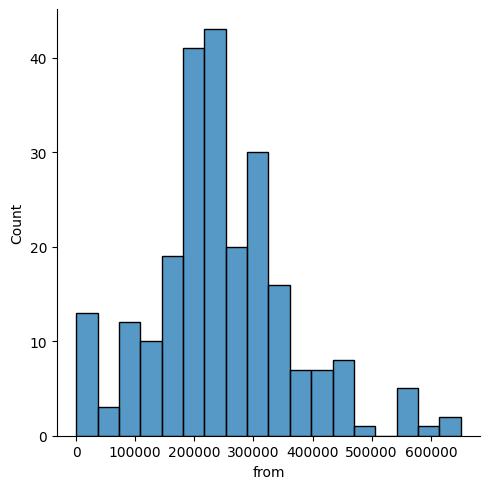

In [45]:
# Оценим распределение нижних границ вилки
sns.displot(ods_jobs_from['from'])

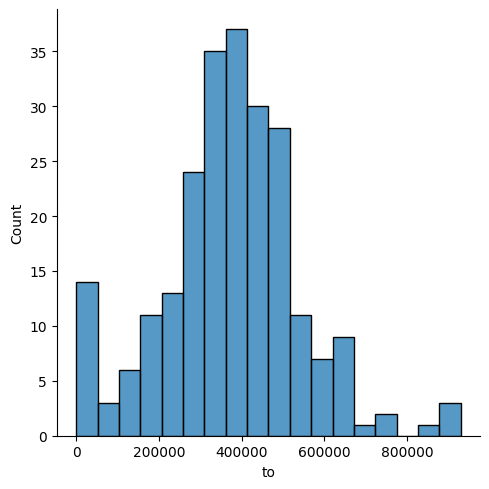

In [46]:
# Оценим распределение верхних границ вилки
sns.displot(ods_jobs_to['to'])

## Объединение данных

In [47]:
# Переименуем столбцы для объединения DataFrame
ods_jobs_from = ods_jobs_from.rename(columns={
    'vacancy_title': 'Name',
    'from': 'From',
    'job_description': 'Description'
})
ods_jobs_to = ods_jobs_to.rename(columns={
    'vacancy_title': 'Name',
    'to': 'To',
    'job_description': 'Description'
})

# Объединим DataFrame
combined_df_from = pd.concat([kaggle_dataset_1_from, ods_jobs_from], ignore_index=True)
combined_df_to = pd.concat([kaggle_dataset_1_to, ods_jobs_to], ignore_index=True)

In [48]:
# Итоговые объединенные DataFrame
display(combined_df_from.head(5))
display(combined_df_to.head(5))

,Name,From,Description
0,Аналитик бизнес-процессов,50000.0,Мы набираем свою команду для разработки и сопр...
1,Руководитель отдела обработки данных,130000.0,Мы расширяем команду Ипотечного брокера и ищем...
2,Аналитик данных,80000.0,Команда Важной Рыбы сейчас активно растет и ищ...
3,Аналитик,50000.0,"Привет, это международная студия образовательн..."
4,Data Scientist (Remote),120000.0,Spark Equation is a software-enabled IT and st...


,Name,To,Description
0,Аналитик данных,120000.0,Команда Важной Рыбы сейчас активно растет и ищ...
1,Аналитик,70000.0,"Привет, это международная студия образовательн..."
2,Data Scientist (Remote),190000.0,Spark Equation is a software-enabled IT and st...
3,BI Developer,230000.0,Мы IT X 100 – мульти продуктовый стартап. Слаж...
4,Аналитик бизнес-процессов,78300.0,Heads and Hands — первая в России студия разра...


In [49]:
print(combined_df_from.shape)
print(combined_df_to.shape)

(1191, 3)
(949, 3)


# Model

## 1. Датасет hh.ru (TF-IDF -> linear regression)

### 1.1 Нижняя граница вилки

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

y = kaggle_dataset_1_from['From']
X = kaggle_dataset_1_from[['Name', 'Description']]

# Преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1,2)), 'Name'),
        ('desc_tfidf', TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(3,5)), 'Description'),
    ])

# Создаем пайплайн
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', LinearRegression())
])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель на тренировочных данных
pipeline.fit(X_train, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Оценим важность фичей
# Достаем списки слов-фичей из TF-IDF для Name и Description
name_feature_names = pipeline.named_steps['tfidf'].transformers_[0][1].get_feature_names_out()
desc_feature_names = pipeline.named_steps['tfidf'].transformers_[1][1].get_feature_names_out()

# Получаем коэффициенты регрессии
regressor_coef = pipeline.named_steps['regressor'].coef_

# Коэффициенты для Name фичей
name_coef = regressor_coef[:len(name_feature_names)]
# Коэффициенты для Description фичей
desc_coef = regressor_coef[len(name_feature_names):]

# Создаем DataFrame для удобного отображения важности фичей
name_importance = pd.DataFrame({'feature': name_feature_names, 'importance': name_coef})
desc_importance = pd.DataFrame({'feature': desc_feature_names, 'importance': desc_coef})

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Объединяем и выводим важность
feature_importance = pd.concat([name_importance, desc_importance], ignore_index=True)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(name_importance.sort_values(by='importance', ascending=False), desc_importance.sort_values(by='importance', ascending=False))

RMSE на тренировочной выборке: 727.3482348438571
RMSE на тестовой выборке: 82303.21392486042
ME на тренировочной выборке: 4.146913900052312e-11
ME на тестовой выборке: 13683.828655139825
MPE на тренировочной выборке: -0.005091785377291818
MPE на тестовой выборке: -9.737303870441947


,feature,importance
27,ml,196200.820450
36,senior,195002.390544
39,system,177987.690313
117,руководитель группы,146496.182189
98,оператор базы,108116.984366
...,...,...
106,программист,-87471.824642
69,веб,-112308.571582
37,senior data,-120920.379431
1,1с erp,-142272.445521


,feature,importance
3695,уверенный пользователь excel,265316.576694
187,if you are,224940.805086
3237,самостоятельно решать задачи,207222.460053
1223,знание конфигурации 1с,203202.991373
2361,от лет знание,197894.040733
...,...,...
2791,преимуществом будет опыт,-155202.054999
1170,заработная плата от,-156607.686603
2530,по версии forbes,-164899.357173
73,1с от лет,-174602.502946


### 1.2 Верхняя граница вилки

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

y = kaggle_dataset_1_to['To']
X = kaggle_dataset_1_to[['Name', 'Description']]

# Преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1,2)), 'Name'),
        ('desc_tfidf', TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(3,5)), 'Description'),
    ])

# Создаем пайплайн
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', LinearRegression())
])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель на тренировочных данных
pipeline.fit(X_train, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Важность фичей
# Достаем списки слов-фичей из TF-IDF для Name и Description
name_feature_names = pipeline.named_steps['tfidf'].transformers_[0][1].get_feature_names_out()
desc_feature_names = pipeline.named_steps['tfidf'].transformers_[1][1].get_feature_names_out()

# Получаем коэффициенты регрессии
regressor_coef = pipeline.named_steps['regressor'].coef_

# Коэффициенты для Name фичей
name_coef = regressor_coef[:len(name_feature_names)]
# Коэффициенты для Description фичей
desc_coef = regressor_coef[len(name_feature_names):]

# Создаем DataFrame для удобного отображения важности фичей
name_importance = pd.DataFrame({'feature': name_feature_names, 'importance': name_coef})
desc_importance = pd.DataFrame({'feature': desc_feature_names, 'importance': desc_coef})

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Объединяем и выводим важность
feature_importance = pd.concat([name_importance, desc_importance], ignore_index=True)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(name_importance.sort_values(by='importance', ascending=False), desc_importance.sort_values(by='importance', ascending=False))

RMSE на тренировочной выборке: 1490.634197778577
RMSE на тестовой выборке: 142833.85561926497
ME на тренировочной выборке: 7.014736719103286e-12
ME на тестовой выборке: -4841.372242025414
MPE на тренировочной выборке: -0.033574714189149674
MPE на тестовой выборке: -17.600366394840485


,feature,importance
23,product analyst,480038.041116
31,web,448241.757079
54,веб аналитик,345138.508299
7,data analyst,338178.500794
30,team,269797.205316
...,...,...
89,разработчик баз,-139173.712255
42,аналитик отдела,-179627.118581
64,консультант 1с,-228645.255728
53,веб,-311068.069306


,feature,importance
508,за счёт компании,494429.353295
426,для работы данными,491872.341645
1666,статистики теории вероятности,399924.027887
114,python для обработки,399865.829784
1087,от лет знание,389714.705407
...,...,...
393,данных из различных,-342766.438398
113,python pandas numpy,-462841.206247
244,видеть за числами,-464440.303208
861,на уровне понимания,-495755.157927


## 3. Датасет ODS Jobs (TF-IDF -> linear regression)

### 3.1 Нижняя граница вилки

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

y = ods_jobs_from['From']
X = ods_jobs_from[['Name', 'Description']]

# Преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(), 'Name'),
        ('desc_tfidf', TfidfVectorizer(), 'Description'),
    ])

# Создаем пайплайн
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', LinearRegression())
])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель на тренировочных данных
pipeline.fit(X_train, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME (Mean Error)
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE (Mean Percentage Error)
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Важность фичей
# Достаем списки слов-фичей из TF-IDF для Name и Description
name_feature_names = pipeline.named_steps['tfidf'].transformers_[0][1].get_feature_names_out()
desc_feature_names = pipeline.named_steps['tfidf'].transformers_[1][1].get_feature_names_out()

# Получаем коэффициенты регрессии
regressor_coef = pipeline.named_steps['regressor'].coef_

# Коэффициенты для Name фичей
name_coef = regressor_coef[:len(name_feature_names)]
# Коэффициенты для Description фичей
desc_coef = regressor_coef[len(name_feature_names):]

# Создаем DataFrame для удобного отображения важности фичей
name_importance = pd.DataFrame({'feature': name_feature_names, 'importance': name_coef})
desc_importance = pd.DataFrame({'feature': desc_feature_names, 'importance': desc_coef})

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Объединяем и выводим важность
feature_importance = pd.concat([name_importance, desc_importance], ignore_index=True)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(name_importance.sort_values(by='importance', ascending=False), desc_importance.sort_values(by='importance', ascending=False))

RMSE на тренировочной выборке: 2564.945880647462
RMSE на тестовой выборке: 99375.53966335923
ME на тренировочной выборке: 1.1737268467090632e-11
ME на тестовой выборке: -5857.230171149521
MPE на тренировочной выборке: -0.006234378240129996
MPE на тестовой выборке: -378.2198027069302


,feature,importance
8,business,199751.288603
35,java,188082.675708
46,mlops,171167.684175
5,and,160646.027803
58,research,125104.662723
...,...,...
1,advanced,-121279.317338
71,sports,-121279.317338
44,ml,-122980.918088
36,junior,-144153.231964


,feature,importance
2005,period,556605.706332
2115,probationary,556605.706332
173,after,532580.048504
2059,possible,506737.965112
1473,lithuania,503172.650639
...,...,...
1272,in,-147878.991131
287,at,-156310.629068
2281,research,-163225.402360
1927,or,-176375.956384


### 3.2 Верхняя граница вилки

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

y = ods_jobs_to['To']
X = ods_jobs_to[['Name', 'Description']]

# Определяем преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(), 'Name'),
        ('desc_tfidf', TfidfVectorizer(), 'Description'),
    ])

# Создаем пайплайн
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', LinearRegression())
])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель на тренировочных данных
pipeline.fit(X_train, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME (Mean Error)
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE (Mean Percentage Error)
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Важность фичей
# Достаем списки слов-фичей из TF-IDF для Name и Description
name_feature_names = pipeline.named_steps['tfidf'].transformers_[0][1].get_feature_names_out()
desc_feature_names = pipeline.named_steps['tfidf'].transformers_[1][1].get_feature_names_out()

# Получаем коэффициенты регрессии
regressor_coef = pipeline.named_steps['regressor'].coef_

# Коэффициенты для Name фичей
name_coef = regressor_coef[:len(name_feature_names)]
# Коэффициенты для Description фичей
desc_coef = regressor_coef[len(name_feature_names):]

# Создаем DataFrame для удобного отображения важности фичей
name_importance = pd.DataFrame({'feature': name_feature_names, 'importance': name_coef})
desc_importance = pd.DataFrame({'feature': desc_feature_names, 'importance': desc_coef})

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Объединяем и выводим важность
feature_importance = pd.concat([name_importance, desc_importance], ignore_index=True)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(name_importance.sort_values(by='importance', ascending=False), desc_importance.sort_values(by='importance', ascending=False))

RMSE на тренировочной выборке: 4.2134195870746725
RMSE на тестовой выборке: 118507.53963557078
ME на тренировочной выборке: 2.3221141321861997e-11
ME на тестовой выборке: 7530.565360652279
MPE на тренировочной выборке: inf
MPE на тестовой выборке: -310.7782737217967


,feature,importance
8,business,265364.645101
34,java,260347.121380
46,mlops,201328.810976
53,pytorch,174603.221988
24,gen,170698.801111
...,...,...
74,sports,-173073.280480
22,for,-173073.280480
1,advanced,-173073.280480
51,project,-173073.280480


,feature,importance
2181,probationary,638344.355401
2073,period,638344.355401
179,after,616965.279979
2126,possible,594765.122819
657,courses,581394.080993
...,...,...
3196,ало,-170763.041448
2357,research,-179144.294167
284,as,-220235.782951
1987,or,-241883.482837


## 3. Объединенный датасет

### 3.1 Верхняя граница вилки (TF-IDF -> linear regression)

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

y = combined_df_from['From']
X = combined_df_from[['Name', 'Description']]

# Преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(1,2)), 'Name'),
        ('desc_tfidf', TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(3,5)), 'Description'),
    ])

# Создаем пайплайн
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', LinearRegression())
])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель на тренировочных данных
pipeline.fit(X_train, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Важность фичей
# Достаем списки слов-фичей из TF-IDF для Name и Description
name_feature_names = pipeline.named_steps['tfidf'].transformers_[0][1].get_feature_names_out()
desc_feature_names = pipeline.named_steps['tfidf'].transformers_[1][1].get_feature_names_out()

# Получаем коэффициенты регрессии
regressor_coef = pipeline.named_steps['regressor'].coef_

# Коэффициенты для Name фичей
name_coef = regressor_coef[:len(name_feature_names)]
# Коэффициенты для Description фичей
desc_coef = regressor_coef[len(name_feature_names):]

# Создаем DataFrame для удобного отображения важности фичей
name_importance = pd.DataFrame({'feature': name_feature_names, 'importance': name_coef})
desc_importance = pd.DataFrame({'feature': desc_feature_names, 'importance': desc_coef})

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Объединяем и выводим важность
feature_importance = pd.concat([name_importance, desc_importance], ignore_index=True)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(name_importance.sort_values(by='importance', ascending=False), desc_importance.sort_values(by='importance', ascending=False))

RMSE на тренировочной выборке: 2.5784559302287002
RMSE на тестовой выборке: 64336.35816542625
ME на тренировочной выборке: -7.332514427570987e-11
ME на тестовой выборке: -498.3731588915172
MPE на тренировочной выборке: 0.0007881074284450512
MPE на тестовой выборке: -69.69915344418807


,feature,importance
439,mlops,267879.224709
586,senior,160622.694838
355,lead,160332.569958
43,ai generalist,127953.960151
291,generalist,127953.960151
...,...,...
597,senior ml,-84636.727543
339,junior,-84641.884389
1262,младший,-91340.439301
1690,специалист,-95512.870426


,feature,importance
95229,www greenscreens ai is dynamic,138229.273726
9576,ai https www greenscreens,138229.273726
40839,greenscreens ai https,138229.273726
45483,infrastructure greenscreens ai https,138229.273726
45484,infrastructure greenscreens ai https www,138229.273726
...,...,...
81143,startup moderation review,-72397.119511
60365,of our startup moderation review,-72397.119511
13071,and infrastructure greenscreens ai is,-144794.239023
45485,infrastructure greenscreens ai is,-144794.239023


### 3.1 Верхняя граница вилки (TF-IDF -> linear regression c подбором параметров)

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

y = combined_df_from['From']
X = combined_df_from[['Name', 'Description']]

# Преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(1,2)), 'Name'),
        ('desc_tfidf', TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(3,5)), 'Description'),
    ])

# Создаем пайплайн
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', LinearRegression())
])

# Определим сетку параметров
param_grid = {
    'tfidf__name_tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__name_tfidf__max_df': [0.7, 0.8, 0.9],
    'tfidf__name_tfidf__min_df': [1, 2],
    'tfidf__desc_tfidf__ngram_range': [(1, 2), (3, 5)],
    'tfidf__desc_tfidf__max_df': [0.7, 0.8],
    'tfidf__desc_tfidf__min_df': [1, 2],
    'regressor__fit_intercept': [True, False],
}

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настраиваем GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_)

# Получение лучшей модели из GridSearchCV
best_model = grid_search.best_estimator_

# Предсказания на тестовых данных с лучшей моделью
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Важность фичей
# Достаем списки слов-фичей из TF-IDF для Name и Description
name_feature_names = best_model.named_steps['tfidf'].transformers_[0][1].get_feature_names_out()
desc_feature_names = best_model.named_steps['tfidf'].transformers_[1][1].get_feature_names_out()

# Получаем коэффициенты регрессии
regressor_coef = best_model.named_steps['regressor'].coef_

# Коэффициенты для Name фичей
name_coef = regressor_coef[:len(name_feature_names)]
# Коэффициенты для Description фичей
desc_coef = regressor_coef[len(name_feature_names):]

# Создаем DataFrame для удобного отображения важности фичей
name_importance = pd.DataFrame({'feature': name_feature_names, 'importance': name_coef})
desc_importance = pd.DataFrame({'feature': desc_feature_names, 'importance': desc_coef})

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Объединяем и выводим важность
feature_importance = pd.concat([name_importance, desc_importance], ignore_index=True)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(name_importance.sort_values(by='importance', ascending=False), desc_importance.sort_values(by='importance', ascending=False))


Лучшие параметры: {'regressor__fit_intercept': True, 'tfidf__desc_tfidf__max_df': 0.7, 'tfidf__desc_tfidf__min_df': 1, 'tfidf__desc_tfidf__ngram_range': (3, 5), 'tfidf__name_tfidf__max_df': 0.7, 'tfidf__name_tfidf__min_df': 2, 'tfidf__name_tfidf__ngram_range': (1, 1)}
Лучший результат (MSE): 4681338216.062407
RMSE на тренировочной выборке: 3.1155893958833873
RMSE на тестовой выборке: 64921.33548868035
ME на тренировочной выборке: 2.184315846779016e-11
ME на тестовой выборке: -1877.284281938062
MPE на тренировочной выборке: -0.00029004679671676165
MPE на тестовой выборке: -71.23086217995522


,feature,importance
52,mlops,207309.424948
24,deep,172385.330518
40,java,148331.093232
44,learning,137300.439400
68,researcher,131590.601107
...,...,...
182,онлайн,-70772.264162
183,оператор,-78209.936097
231,специалист,-86347.477980
168,младший,-90676.671201


,feature,importance
25230,courses after the probationary period,139749.661639
40840,greenscreens ai https www,139749.661639
45483,infrastructure greenscreens ai https,139749.661639
95228,www greenscreens ai is,139749.661639
81148,startup paid english courses after,139749.661639
...,...,...
81144,startup moderation review in,-73406.209680
81145,startup moderation review in the,-73406.209680
45486,infrastructure greenscreens ai is dynamic,-146812.419360
45485,infrastructure greenscreens ai is,-146812.419360


### 3.2 Верхняя граница вилки (TF-IDF -> xgboost)

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

y = combined_df_from['From']
X = combined_df_from[['Name', 'Description']]

# Преобразование для текстовых полей с использованием TF-IDF
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(1, 2)), 'Name'),
        ('desc_tfidf', TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(3, 5)), 'Description'),
    ])

# Создаем пайплайн с XGBRegressor
pipeline = Pipeline([
    ('tfidf', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8
    ))
])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем пайплайн
pipeline.fit(X_train, y_train)

# Предсказания на тестовых данных
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Вычисление ME
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

me_train = mean_error(y_train, y_train_pred)
me_test = mean_error(y_test, y_test_pred)

# Функция для вычисления MPE
def mean_percentage_error(y_true, y_pred):
    # Добавляем маленькое число к y_true, чтобы избежать деления на ноль
    return np.mean((y_true - y_pred) / (y_true + 1e-8)) * 100

# Вычисление MPE
mpe_train = mean_percentage_error(y_train, y_train_pred)
mpe_test = mean_percentage_error(y_test, y_test_pred)

# Получаем имена фичей из ColumnTransformer
def get_feature_names_from_column_transformer(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop' or transformer == 'passthrough':
            continue
        elif hasattr(transformer, 'get_feature_names_out'):
            transformer_feature_names = transformer.get_feature_names_out()
            # Добавляем имя преобразователя к имени признака для уникальности
            transformer_feature_names = [f"{name}__{feat}" for feat in transformer_feature_names]
            feature_names.extend(transformer_feature_names)
        else:
            # Обработка преобразователей без метода get_feature_names_out
            n_features = transformer.transform(np.empty((0, len(columns)))).shape[1]
            transformer_feature_names = [f"{name}__{i}" for i in range(n_features)]
            feature_names.extend(transformer_feature_names)
    return feature_names

# Получаем все имена признаков из препроцессора
feature_names = get_feature_names_from_column_transformer(pipeline.named_steps['tfidf'])

# Получаем важность признаков из регрессора
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Проверяем соответствие размеров
assert len(feature_names) == len(feature_importances), "Количество признаков и важностей не совпадает!"

# Создаем DataFrame для удобного отображения важности признаков
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Вывод результатов
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")
print(f"ME на тренировочной выборке: {me_train}")
print(f"ME на тестовой выборке: {me_test}")
print(f"MPE на тренировочной выборке: {mpe_train}")
print(f"MPE на тестовой выборке: {mpe_test}")

# Выводим важность признаков
display(feature_importance_df)

RMSE на тренировочной выборке: 25618.31951121169
RMSE на тестовой выборке: 69947.26636839395
ME на тренировочной выборке: 82.87132927389709
ME на тестовой выборке: 5430.670113101464
MPE на тренировочной выборке: -64.80580268965869
MPE на тестовой выборке: -91.0741300264107


,feature,importance
57866,desc_tfidf__moderation review in,0.086262
46473,desc_tfidf__in the archive,0.021208
80384,desc_tfidf__solid understanding of,0.017051
237,name_tfidf__engineer junior,0.013276
349311,desc_tfidf__полная удаленка по,0.011647
...,...,...
171200,desc_tfidf__до готового решения,0.000000
171199,desc_tfidf__до года зависимости от команды,0.000000
171198,desc_tfidf__до года зависимости от,0.000000
171197,desc_tfidf__до года зависимости,0.000000


# Выводы

## Текущее состояние

### Подготовка и обработка данных

- Данные собраны, отфильтрованы нерелевантные данные
- Извлечены нижняя (From) и верхняя (To) границы зарплатной вилки.
- Извлечены названия вакансий и описания.
- Проведена предварительная обработка текста, включая удаление HTML-тегов и нормализацию символов.

### EDA
- Обнаружена значительная асимметрия в данных с наличием выбросов в виде очень высоких и очень низких зарплат.

### Модели

В качестве базового решения выбран пайплайн:
- TF-IDF для преобразования текстовых данных в числовые признаки
- Линейная регрессия / XGBoost

Качество моделей оценивалось по метрикам RMSE, ME, MPE. Дополнительно была предпринята попытка интерпретации признаков полученных при помощи TF-IDF.

## Планы по улучшению

### Добавление данных
- Добавить данные с hh.ru, полученные через API. Сбор ведется в данный момент.
- Добавить данные из дампа better data community.

### Улучшение данных
- Удаление выбросов и аномалий в зарплатах (на графиках распределения виден пик в области нуля, очевидно, что бесплатно никто не работает).
- Проверка и коррекция ошибок в данных (пропущенные значения, некорректные единицы измерения).
- Данные сильно разнесены во времени, добавление временных меток и учет инфляции для может улучшить качество модели.

### Продвинутая обработка текста
- Снизить размерность признакового пространства при помощи PCA.
- Использование эмбеддингов слов (Word2Vec, FastText) или трансформеров (BERT) для более глубокой интерпретации текста, хотя это и сделает интерпретацию крайне затруднительной.
- Выделить из текста в отдельные категориальные признаки - локацию, требования к опыту работы, грейд.
- Часть вакансий на английском - использовать машинный перевод.

### Улучшение моделей
- Применить другие модели (Random Forest, нейронные сети)

### Оптимизация и валидация
- Оптимизировать гиперпараметры при помощи Random Search или GridSearch.

### Улучшение метрик оценки
- Очевидно, что ME и MPE очень неустойчивы из-за большого размаха целевой переменной. Например: MPE изменяется от 17% до 90% при незначительном изменении RMSE. Рассмотреть возможность применения WMPE (weighted MPE) или для ME и MPE применять расчет по когортам.
- Рассмотреть возможность применения других метрик.

### Интерпретация модели
- Попробовать SHAP для интерпретации влияния признаков